In [1]:
library(Seurat)
library(stringr)
library(RColorBrewer)
library(scales)
library(goseq)
library(viridis)

Loading required package: BiasedUrn
Loading required package: geneLenDataBase

Loading required package: viridisLite

Attaching package: ‘viridis’

The following object is masked from ‘package:scales’:

    viridis_pal



In [2]:
cols = read.csv("../Table/celltype_colors.csv")

In [3]:
cols[2, "celltype"] = "Endothelial"

In [4]:
geneinfo = read.table("/publicdata/gencode_v19_20151104/gene_info.tsv", sep = "\t", header = T)

In [5]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.analyzed.filtered.clustered_finalAnnotation", sep = "")
load(f, verbose = T)

Loading objects:
  tiss.filtered


# Figure 4A

In [6]:
PlotUMAP <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    my_color_palette <- hue_pal()(length(unique(umap$clusters)))
    
    if(length(cols2use) > 0){colrs = data.frame(clusters = unique(umap$clusters), color = cols2use)}
    else{colrs = data.frame(clusters = sort(unique(umap$clusters)), color = my_color_palette)}
    umap$color = colrs[match(umap$clusters, colrs$clusters), "color"]
    

    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1)

    if( plot_leg == TRUE){
        legend(lX, lY,
               legend = colrs$clusters,
               col    = colrs$color,
               pch    = rep(16, nrow(colrs)),
               cex=.9,
               bg="transparent",
               box.lty = 0,
               y.intersp = 1.75,
               ncol = n.col,
               x.intersp = 1.15,
               text.width = text_width)
    }
    
    return(colrs)
    
}

In [7]:
cols = data.frame(celltype = sort(unique(tiss.filtered$major_cell_population)),
                  col = c("#56ccd8", "#9c0031", "#5ebd53", "#d984c6", "#ede99a", "#d49100", "#c9c230", "#a39000", "#827f80"))

cols[cols$celltype %in% c("PPC_early", "PPC_late", "PPC_moderate_1", "PPC_moderate_2"), "col"] = "#42d488"
cols[cols$celltype %in% c("iPSC"), "col"] = "#02592c"

colsInt = rbind(data.frame(celltype = "0_PPC_unknown", col = "#7dba9a"), cols)

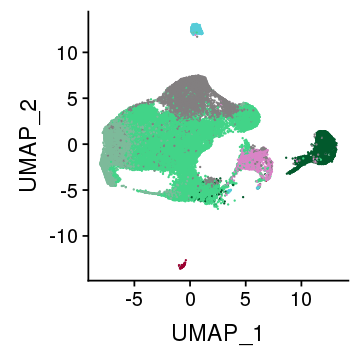

In [123]:
options(repr.plot.width = 3, repr.plot.height = 3)
DimPlot(tiss.filtered, reduction = "umap", group.by = "major_cell_population_updated", cols = colsInt$col, label = F) + NoLegend()

# Figure 1C

In [9]:
tiss.filtered@meta.data$major_cell_population_updated2 <- tiss.filtered@meta.data$major_cell_population_updated

In [10]:
tiss.filtered@meta.data[tiss.filtered@meta.data$major_cell_population_updated %in% c("PPC_early", "PPC_late", "PPC_moderate_1", "PPC_moderate_2"), "major_cell_population_updated2"] <- "PPC"

In [125]:
# unique(tiss.filtered@meta.data$major_cell_population_updated2)
colsInt[ colsInt$celltype  %in% c("PPC_early", "PPC_late", "PPC_moderate_1", "PPC_moderate_2"), ]$celltype = "PPC"
colsInt = colsInt[! duplicated(colsInt$celltype), ]


In [126]:
PlotFractionCluster <- function(){
    barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$major_cell_population_updated2))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
    barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
    barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
    barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
    barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
    barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])

    barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 6], -barfrac_fractions[, 5]), ]

    barfrac_fractions = barfrac_fractions[, c("PPC", "0_PPC_unknown", "repl", "Endocrine", "mesenchymal", "Endothelial", "iPSC")]
    
    barplot(t(barfrac_fractions), names.arg = str_split_fixed(colnames(t(barfrac_fractions)), "_", 3)[, 3], las = 2,
            col = colsInt[c(6, 1, 7, 2, 5, 3, 4), "col"], #cols[cols$celltype %in% unique(tiss.filtered@meta.data$major_cell_population), ]$col,
            ylab = "Cluster (%)")
}

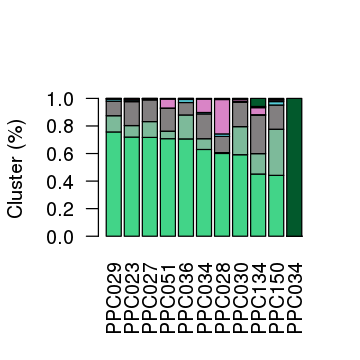

In [127]:
PlotFractionCluster()

# Vs FACS

In [88]:
t1 = read.csv("../Table/PPC_pilot_sequenced_samples.csv")[1:12,]
t1.temp = t1[! is.na(t1$PDX1_NKX61), ]
t1.temp = t1.temp[order(-t1.temp$PDX1_NKX61),]
t1.temp$UDID = gsub("_", "", t1.temp$UDID)
t1.temp = t1.temp[! t1.temp$UDID == "PPC069", ]

In [144]:
PlotFractionClusterVSFACS <- function(){
    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    
    
    barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$major_cell_population_updated2))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
    barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
    barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
    barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
    barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
    barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])

    barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 6], -barfrac_fractions[, 5]), ]
    
    my_color_palette <- hue_pal()(ncol(barfrac_fractions))

    barfrac_fractions = cbind(barfrac_fractions, gsub("_", "", str_split_fixed(rownames(barfrac_fractions), "_", 3)[,3]))
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions)], t1.temp$UDID), "PDX1_NKX61"]  )
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 1], t1.temp$UDID), "PDX1"]  )
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 2], t1.temp$UDID), "NKX61"]  )

    barfrac_fractions = barfrac_fractions[1:nrow(barfrac_fractions)-1, ] #remove iPSC
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
#     my_color_palette <- hue_pal()(length(unique(umap$clusters)))

    barfrac_fractions = as.data.frame(barfrac_fractions)
    
    x = (as.numeric(barfrac_fractions[,6]) * 100)
    y = as.numeric(barfrac_fractions[,"V10"])

    plot(x, y, col = col_vector, pch = 19, cex = 1.5, las = 1, xlim = c(0,100), ylim = c(0,100),
         xlab = "% Clusters 0", ylab = "% PDX1+/NKX6.1+")
    

    text(x, y, rownames(barfrac_fractions), cex = .5)
    
#     abline(lm(y ~ x),col = "black")
    lines(x = c(0,100), y = c(0,100))
    p = round(cor.test(y , x, method = "pearson")$p.val, 3)
    rho = round(as.numeric(str_split_fixed(cor.test(y , x, method = "pearson")$estimate, ":", 2)[1]), 2)
    text(0, 90, paste("p = ", p, sep = ""), pos = 4)
    text(0, 80, paste("r = ", rho, sep = ""), pos = 4)
    

#     print(rho)
#     print(p)
#     return(barfrac_fractions)    
}

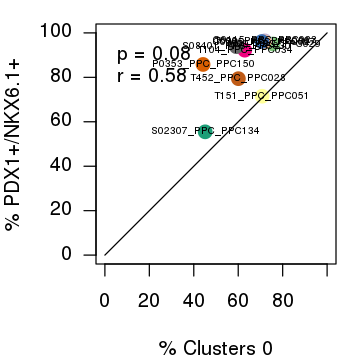

In [146]:
# I think FACS is overestimating....
PlotFractionClusterVSFACS()


In [14]:
Idents(tiss.filtered) = 'major_cell_population_updated2'

In [15]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

iPSC_markers           = read.table(paste(out, "iPSC_markers.txt", sep = ""))
repl_markers           = read.table(paste(out, "repl_markers.txt", sep = ""))
ppc_markers            = read.table(paste(out, "all.ppc_markers.txt", sep = ""))
nonppc_markers         = read.table(paste(out, "non.ppc.c4_markers.txt", sep = ""))
Endocrine_markers      = read.table(paste(out, "Endocrine_markers.txt", sep = ""))
mesenchymal_markers    = read.table(paste(out, "mesenchymal_markers.txt", sep = ""))
endothelial_markers    = read.table(paste(out, "endothelial_markers.txt", sep = ""))

In [285]:
nrow(iPSC_markers       )
nrow(repl_markers       )
nrow(ppc_markers        )
nrow(nonppc_markers     )
nrow(Endocrine_markers  )
nrow(mesenchymal_markers)
nrow(endothelial_markers)

[1] 1862

[1] 210

[1] 385

[1] 385

[1] 832

[1] 609

[1] 1465

# Calculate enrichment of marker genes with T2D genes

In [137]:
# rownames(iPSC_markers)[1:5]
# rownames(ppc_markers)[1:5]
# rownames(repl_markers)[1:5]
# rownames(Endocrine_markers)[1:5]
# rownames(mesenchymal_markers)[1:5]
# rownames(endothelial_markers)[1:5]

In [138]:
t2dloci = read.table('/frazer01/projects/PPC/analysis/snATAC_analysis/t2d_loci/t2d_loci.bed', header = F)
t2d.genes = unique(str_split_fixed(t2dloci$V4, "_", 3)[, 1])

In [287]:
length(t2d.genes)

[1] 239

In [314]:
CheckIfDiabetes <- function(markers, ct){
    
    gs = t2d.genes[t2d.genes %in% rownames(markers[ markers$p_val_adj < 0.05 & markers$avg_logFC > 0.10, ])]
    temp = data.frame(celltype = rep(ct, length(gs)), marker_and_t2dgene = gs)
    return(temp)
    
}

In [315]:
cts_t2d_genes = data.frame(celltype = NA, marker_and_t2dgene = NA)

cts_t2d_genes = rbind(cts_t2d_genes, CheckIfDiabetes(ppc_markers, "PPC"))
# cts_t2d_genes = rbind(cts_t2d_genes, CheckIfDiabetes(nonppc_markers, "PPC_subcluster_4"))
cts_t2d_genes = rbind(cts_t2d_genes, CheckIfDiabetes(iPSC_markers, "iPSC"))
cts_t2d_genes = rbind(cts_t2d_genes, CheckIfDiabetes(repl_markers, "Replicating_cells"))
cts_t2d_genes = rbind(cts_t2d_genes, CheckIfDiabetes(Endocrine_markers, "Endocrine"))
cts_t2d_genes = rbind(cts_t2d_genes, CheckIfDiabetes(mesenchymal_markers, "Mesenchymal"))
cts_t2d_genes = rbind(cts_t2d_genes, CheckIfDiabetes(endothelial_markers, "Endothelial"))

x = data.frame(table(cts_t2d_genes$marker_and_t2dgene))
colnames(x) = c("marker_and_t2dgene", "Frequency")

# write.table(merge(cts_t2d_genes, x), file = "../Table/celltype_specific_T2D_genes.txt", quote = F, row.names = F)

In [318]:
a = merge(cts_t2d_genes, x)
a = a[a$Frequency == 1,]
a[order(a$celltype), ]

,marker_and_t2dgene,celltype,Frequency
,<chr>,<chr>,<int>
8,CRYBA2,Endocrine,1
48,WFS1,Endocrine,1
1,ADAMTS9,Endothelial,1
3,CCND2,Endothelial,1
7,CLEC14A,Endothelial,1
9,ETS1,Endothelial,1
16,INSR,Endothelial,1
17,ITGA1,Endothelial,1
19,LPP,Endothelial,1


In [ ]:
expression_matrix = tiss.filtered@assays$RNA
tiss.filtered@meta.data$Barcode <- rownames(tiss.filtered@meta.data) 
ct.barcodes = data.frame(tiss.filtered@meta.data$major_cell_population_updated2, tiss.filtered@meta.data$Barcode)
colnames(ct.barcodes) <- c("cell", "barcode")

In [219]:
CheckIfExpressed <- function(row){

    return(sum(row > 0) / length(row))

}

In [220]:
checkexpressed = data.frame(genes = rownames(expression_matrix),
                            iPSC = NA, PPC = NA, repl = NA, mesenchymal = NA, Endocrine = NA, Endothelial = NA)

checkexpressed["iPSC"] = apply(expression_matrix[, ct.barcodes[ct.barcodes$cell == "iPSC" , "barcode"]], 1, CheckIfExpressed)
checkexpressed["repl"] = apply(expression_matrix[, ct.barcodes[ct.barcodes$cell == "repl" , "barcode"]], 1, CheckIfExpressed)
checkexpressed["mesenchymal"] = apply(expression_matrix[, ct.barcodes[ct.barcodes$cell == "mesenchymal" , "barcode"]], 1, CheckIfExpressed)
checkexpressed["Endocrine"] = apply(expression_matrix[, ct.barcodes[ct.barcodes$cell == "Endocrine" , "barcode"]], 1, CheckIfExpressed)
checkexpressed["Endothelial"] = apply(expression_matrix[, ct.barcodes[ct.barcodes$cell == "Endothelial" , "barcode"]], 1, CheckIfExpressed)

In [234]:
checkexpressed["PPC"] = apply(expression_matrix[, sample(ct.barcodes[ct.barcodes$cell == "PPC" , "barcode"], 10000)], 1, CheckIfExpressed) # too many cells, memory problem so I sampled

In [235]:
head(checkexpressed)

genes,iPSC,PPC,repl,mesenchymal,Endocrine,Endothelial
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L1,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000
WASH7P,0.002722216,0.007,0.01150729,0.01465846,0.00625,0.01066667
MIR1302-11,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000
FAM138A,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000
OR4G4P,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000
OR4G11P,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000


In [236]:
checkexpressed_in25 = checkexpressed

In [237]:
rownames(checkexpressed_in25) <- checkexpressed_in25$genes
checkexpressed_in25$genes <- NULL

In [243]:
checkexpressed_in25$n_celltypes_gt_25 <- NULL
checkexpressed_in25$n_celltypes_gt_25 = apply(checkexpressed_in25, 1, function(i) sum(i > .10))

In [244]:
head(checkexpressed_in25)

,iPSC,PPC,repl,mesenchymal,Endocrine,Endothelial,n_celltypes_gt_25
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
DDX11L1,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000,0
WASH7P,0.002722216,0.007,0.01150729,0.01465846,0.00625,0.01066667,0
MIR1302-11,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000,0
FAM138A,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000,0
OR4G4P,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000,0
OR4G11P,0.000000000,0.000,0.00000000,0.00000000,0.00000,0.00000000,0


In [247]:
# 10,044 genes expressed in >10% of cells in at least one cell type

n_expressed_genes = nrow(checkexpressed_in25[checkexpressed_in25$n_celltypes_gt_25> 0, ])
n_expressed_genes

[1] 10044

In [246]:
write.table(checkexpressed_in25, file = "../n_expressed_genes_ipsc_ppcs.txt") 

In [282]:
CalculateEnrichment <- function(cell_markers){
    marker = rownames(cell_markers)
    t2d = t2d.genes
    expressed_genes = checkexpressed_in25[checkexpressed_in25$n_celltypes_gt_25> 0, ]

    t2d_expressed       = (expressed_genes[rownames(expressed_genes) %in% t2d, ])
    marker_expressed    = expressed_genes[rownames(expressed_genes) %in% marker, ]


    t2d_expressed_AND_marker_expressed = nrow(marker_expressed[rownames(marker_expressed) %in% rownames(t2d_expressed), ])      
    t2d_expressed_NOT_marker_expressed = nrow(t2d_expressed[! rownames(t2d_expressed) %in% rownames(marker_expressed), ])      
    marker_expressed_NOT_t2d_expressed = nrow(marker_expressed[! rownames(marker_expressed) %in% rownames(t2d_expressed), ])      
    expressed_genes_NOT_t2d_NOT_marker = nrow(expressed_genes[! rownames(expressed_genes) %in% c(rownames(t2d_expressed), (marker_expressed)), ])      

    t2d_expressed_AND_marker_expressed
    t2d_expressed_NOT_marker_expressed
    marker_expressed_NOT_t2d_expressed
    expressed_genes_NOT_t2d_NOT_marker

    test = rbind(c(t2d_expressed_AND_marker_expressed,t2d_expressed_NOT_marker_expressed),
                   c(marker_expressed_NOT_t2d_expressed,expressed_genes_NOT_t2d_NOT_marker) )

    return(fisher.test(test))
}

In [311]:
AskifMarkersareT2Dgenes <- function(cell_markers){
    marker = rownames(cell_markers)
    t2d = t2d.genes
    expressed_genes = checkexpressed_in25[checkexpressed_in25$n_celltypes_gt_25> 0, ]

    t2d_expressed       = (expressed_genes[rownames(expressed_genes) %in% t2d, ])
    marker_expressed    = expressed_genes[rownames(expressed_genes) %in% marker, ]


    t2d_expressed_AND_marker_expressed = nrow(marker_expressed[rownames(marker_expressed) %in% rownames(t2d_expressed), ])      
    t2d_expressed_NOT_marker_expressed = nrow(t2d_expressed[! rownames(t2d_expressed) %in% rownames(marker_expressed), ])      
    marker_expressed_NOT_t2d_expressed = nrow(marker_expressed[! rownames(marker_expressed) %in% rownames(t2d_expressed), ])      
    expressed_genes_NOT_t2d_NOT_marker = nrow(expressed_genes[! rownames(expressed_genes) %in% c(rownames(t2d_expressed), (marker_expressed)), ])      

    t2d_expressed_AND_marker_expressed
    t2d_expressed_NOT_marker_expressed
    marker_expressed_NOT_t2d_expressed
    expressed_genes_NOT_t2d_NOT_marker

    test = rbind(c(t2d_expressed_AND_marker_expressed,t2d_expressed_NOT_marker_expressed),
                   c(marker_expressed_NOT_t2d_expressed,expressed_genes_NOT_t2d_NOT_marker) )

    return(t2d_expressed_AND_marker_expressed)
}

In [299]:
AskifMarkersareT2Dgenes(iPSC_markers)
AskifMarkersareT2Dgenes(ppc_markers)
AskifMarkersareT2Dgenes(nonppc_markers)
AskifMarkersareT2Dgenes(Endocrine_markers)
AskifMarkersareT2Dgenes(mesenchymal_markers)
AskifMarkersareT2Dgenes(endothelial_markers)
AskifMarkersareT2Dgenes(repl_markers)

[1] 34

[1] 14

[1] 14

[1] 20

[1] 19

[1] 34

[1] 5

In [306]:
pdf(file = "../celltypespecific_T2D_gene_enrichment.pdf", width = 3, height = 3)

barplot(c(length(t2d.genes),
        AskifMarkersareT2Dgenes(iPSC_markers),
        AskifMarkersareT2Dgenes(endothelial_markers),
        AskifMarkersareT2Dgenes(Endocrine_markers),
        AskifMarkersareT2Dgenes(mesenchymal_markers),
        AskifMarkersareT2Dgenes(ppc_markers),
        AskifMarkersareT2Dgenes(repl_markers)),
        las = 2, ylim = c(0, 250))

dev.off()

png 
  2

In [283]:
CalculateEnrichment(iPSC_markers)
CalculateEnrichment(ppc_markers)
CalculateEnrichment(nonppc_markers)
CalculateEnrichment(Endocrine_markers)
CalculateEnrichment(mesenchymal_markers)
CalculateEnrichment(endothelial_markers)
CalculateEnrichment(repl_markers)


	Fisher's Exact Test for Count Data

data:  test
p-value = 0.03271
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.020073 2.288250
sample estimates:
odds ratio 
  1.545883 



	Fisher's Exact Test for Count Data

data:  test
p-value = 0.001579
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.416577 4.715814
sample estimates:
odds ratio 
  2.684812 



	Fisher's Exact Test for Count Data

data:  test
p-value = 0.001579
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.416577 4.715814
sample estimates:
odds ratio 
  2.684812 



	Fisher's Exact Test for Count Data

data:  test
p-value = 0.02
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.077854 2.962943
sample estimates:
odds ratio 
  1.831554 



	Fisher's Exact Test for Count Data

data:  test
p-value = 0.001274
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.377540 3.891859
sample estimates:
odds ratio 
  2.376902 



	Fisher's Exact Test for Count Data

data:  test
p-value = 0.001319
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.302000 2.925479
sample estimates:
odds ratio 
  1.974756 



	Fisher's Exact Test for Count Data

data:  test
p-value = 0.2462
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5160244 3.9525434
sample estimates:
odds ratio 
  1.629915 


In [280]:
class_1_genes = lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, ]
class_2_genes = lm_fit_coefs_sig[lm_fit_coefs_sig$estimate < 0, ]
class_3_genes = g2
class_4_genes = g6

CalculateEnrichment(class_1_genes)
CalculateEnrichment(class_2_genes)
CalculateEnrichment(class_3_genes)
CalculateEnrichment(class_4_genes)

[1] 1

[1] 1

[1] 1

[1] 0.2917769

# Figure 4C

In [21]:
top5.eachcelltype = unique(c(rownames(iPSC_markers)[1:5],
                      rownames(ppc_markers)[1:5],
                      rownames(repl_markers)[1:5],
                      rownames(mesenchymal_markers)[1:5],
                      rownames(nonppc_markers)[1:5],
                      rownames(Endocrine_markers)[1:5],
                      rownames(endothelial_markers)[1:5]))

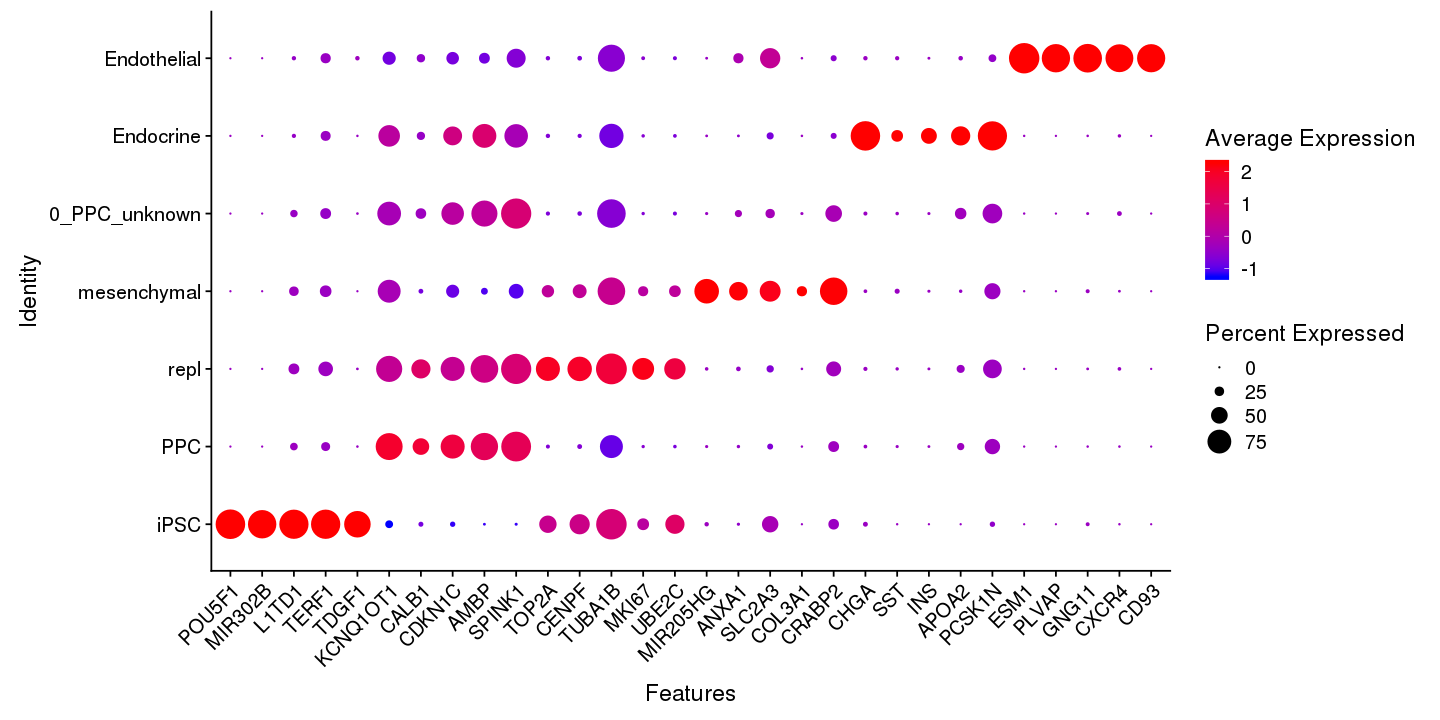

In [22]:
options(repr.plot.width = 12, repr.plot.height = 6)
DotPlot(tiss.filtered, features = rev(top5.eachcelltype), cols = c("blue", "red"), dot.scale = 8) + RotatedAxis()

In [333]:
t2d_expressed2plot = t2d_expressed[t2d_expressed$n_celltypes_gt_25 > 0,]
t2d_expressed2plot = rownames(t2d_expressed2plot[order(-t2d_expressed2plot$n_celltypes_gt_25), ])

In [335]:
out = "../Figures/Manuscript_V04/new_Figure_4_"
pdf(paste(out, "DotPlot_expressed_T2D.pdf"), width = 18, height = 6)
options(repr.plot.width = 18, repr.plot.height = 6)
DotPlot(tiss.filtered, features = t2d_expressed2plot, dot.scale = 8) + RotatedAxis()
dev.off()

png 
  2

# Figure 4D

In [24]:
gowall_ipsc           = read.table(paste(out, "gowall_ipsc.txt", sep = ""))
gowall_repl           = read.table(paste(out, "gowall_repl.txt", sep = ""))
gowall_mesenchyme     = read.table(paste(out, "gowall_mesenchyme.txt", sep = ""))
gowall_endocrine      = read.table(paste(out, "gowall_endocrine.txt", sep = ""))
gowall_endothelial    = read.table(paste(out, "gowall_endothelial.txt", sep = ""))
gowall_ppc            = read.table(paste(out, "gowall_ppc.txt", sep = ""))
gowall_nonppc         = read.table(paste(out, "gowall_nonppc.txt", sep = ""))

In [119]:
plot_go_barplots <- function(table, t){
    
    par(mar = c(4, 15, 2, 1))
    
    if(length(table[table$bh == 0, ]$bh) > 0){
        table[table$bh == 0, ]$bh = 10e-100
    }

    
    barplot(-log(table$pvalue[5:1], 10), names.arg=table$term[5:1], horiz=T, main=t,
            las=1, cex.axis=1, cex.names=1.1, xlab = "-log10(p-value)")
    abline(v=1.3, lwd=2, lty=2, col="red")
    
}

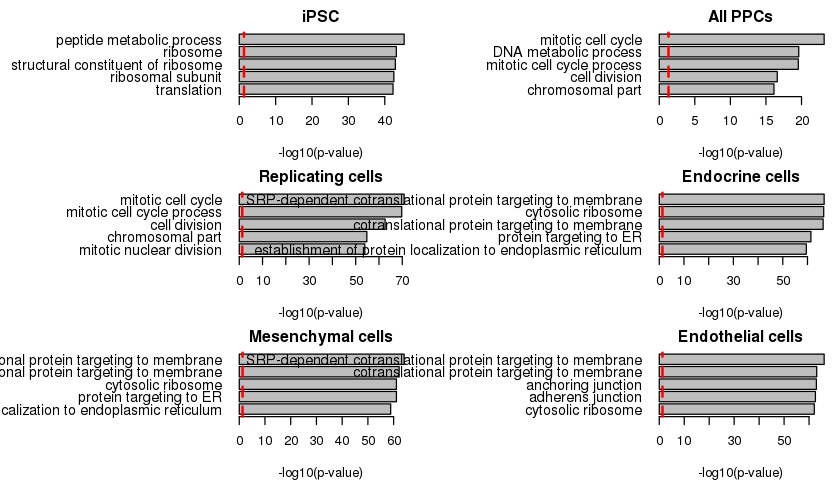

In [120]:
par(mfrow = c(3,2))
options(repr.plot.width = 7, repr.plot.height = 4)

plot_go_barplots(gowall_ipsc       , "iPSC")
plot_go_barplots(gowall_ppc        , "All PPCs")
plot_go_barplots(gowall_repl       , "Replicating cells")
plot_go_barplots(gowall_endocrine  , "Endocrine cells")
plot_go_barplots(gowall_mesenchyme , "Mesenchymal cells")
plot_go_barplots(gowall_endothelial, "Endothelial cells")


# Figure 4E - overlaid pseudotime

In [27]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.integrated.frazer.melton_cluster0_seurat_obj", sep = "")
load(f, verbose = T)

Loading objects:
  integrated.C0_test


In [28]:
integrated.C0_test

An object of class Seurat 
60358 features across 74303 samples within 2 assays 
Active assay: RNA (58358 features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [29]:
Idents(integrated.C0_test) <- "pseudotime_quantile"

In [30]:
unique(Idents(integrated.C0_test))

[1] PPC_2 PPC_3 PPC_1 PPC_4
Levels: PPC_2 PPC_3 PPC_1 PPC_4

In [31]:
tiss.filtered@meta.data$pseudotime = integrated.C0_test@meta.data[match(rownames(tiss.filtered@meta.data),
                                                                        rownames(integrated.C0_test@meta.data)), "pseudotime"]

In [32]:
unique(tiss.filtered@meta.data$major_cell_population_updated2)

[1] "iPSC"          "PPC"           "repl"          "mesenchymal"  
[5] "0_PPC_unknown" "Endocrine"     "Endothelial"

In [33]:
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population_updated2 == "iPSC", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population_updated2 == "Endothelial", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population_updated2 == "Endocrine", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population_updated2 == "mesenchymal", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population_updated2 == "repl", ]$pseudotime = NA
tiss.filtered@meta.data[ tiss.filtered@meta.data$major_cell_population_updated2 == "0_PPC_unknown", ]$pseudotime = NA

In [34]:
PlotUMAPContinuous <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    

#     rbPal <- colorRampPalette(c('red', "yellow", 'blue'))
    umap$color <- plasma(10)[as.numeric(cut(umap$clusters,breaks = 10))]

    
    non_ppc = umap[is.na(umap$color), ]
    
    plot(non_ppc[, 1], non_ppc[, 2],
        pch = 19, 
        col = "grey", 
        cex = .25,
        xlab = "UMAP1",
        ylab = "UMAP2",
        las = 1)

    umap$celltype = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), "major_cell_population"]
    umap[umap$celltype %in% c("iPSC", "Endothelial", "Endocrine", "mesenchymal", "repl"), ]$color = "grey"
    points(umap[, 1], umap[, 2],
         pch = 19, 
         col = umap$color,
         cex = .01)
    
    
}

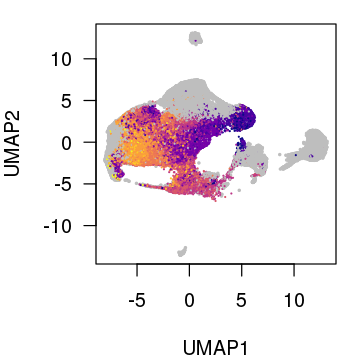

In [35]:
PlotUMAPContinuous(tiss.filtered, "pseudotime", 7, 16, text_width = 2, n.col = 2)

# 4F - LR results and Mfuzz (clusters 2 and 6)

In [36]:
library(ggplot2)

In [38]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
load(paste(out, "obj.integrated.frazer.melton_cluster0_pseudotime", sep = ""), verbose = T)
cds

class: cell_data_set 
dim: 58358 74303 
metadata(1): cds_version
assays(1): counts
rownames(58358): DDX11L1 WASH7P ... RNF212B TMEM269
rowData names(2): id gene_short_name
colnames(74303): AATGGAACACTGAGGA-1 AGATCCATCGAAACAA-1 ...
  x1_S6c_b2.bcCDKI x1_S6c_b2.bcCKKM
colData names(35): orig.ident nCount_RNA ... RNA_snn_res.0.3
  Size_Factor
reducedDimNames(2): PCA UMAP
spikeNames(0):

In [39]:
# bin time by quantiles
pseudotime_ppc = as.data.frame(pseudotime(cds))
colnames(pseudotime_ppc) = "pseudotime"
quants = as.data.frame(quantile(pseudotime_ppc$pseudotime))

pseudotime_ppc$quants = NA
pseudotime_ppc$pseudotime = as.numeric(pseudotime_ppc$pseudotime)

pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[1, 1] & pseudotime_ppc$pseudotime <= quants[2, 1],  "quants" ] = "PPC_1"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[2, 1] & pseudotime_ppc$pseudotime <= quants[3, 1],  "quants" ] = "PPC_2"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[3, 1] & pseudotime_ppc$pseudotime <= quants[4, 1],  "quants" ] = "PPC_3"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[4, 1] & pseudotime_ppc$pseudotime <= quants[5, 1],  "quants" ] = "PPC_4"


pData(cds)$pseudotime_quantile = pseudotime_ppc[match(rownames(pData(cds)), rownames(pseudotime_ppc)), "quants"]

In [40]:
cds_subset <- cds[, colData(cds)$study %in% "Frazer"]

In [41]:
# Changes over PPC time

out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

lm_fit_coefs = read.table(paste(out, "ppc_fit_coefs_frazer_ppc_allexpressedgenes_191212.txt", sep = ""))
lm_fit_coefs_sig = lm_fit_coefs[lm_fit_coefs$q_value < 0.05, ]
mfuzz = read.table(paste(out, "mfuzz_k10_b4_memberships_191213.txt", sep = ""))

In [55]:
mfuzz$real = NA
for( i in seq(1, nrow(mfuzz))){
    mfuzz[i, "real"] = mfuzz[i, mfuzz[i, "maxCol"]] > 0.70   
}

In [56]:
g2 = mfuzz[mfuzz$maxCol == 1 & mfuzz$real == TRUE,]
g6 = mfuzz[mfuzz$maxCol == 6 & mfuzz$real == TRUE,]

In [57]:
head(lm_fit_coefs_sig)
head(mfuzz)

,gene_short_name,term,estimate,std_err,p_value,q_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
117,ABHD3,pseudotime_bin,0.0062627697,7.225189e-04,7.679528e-08,0.0026058941
128,ABLIM1,pseudotime_bin,0.0063035096,7.941619e-04,2.740772e-07,0.0092832700
816,AC011298.2,pseudotime_bin,-0.0010877546,1.125858e-04,1.513039e-08,0.0005141912
1098,AC023590.1,pseudotime_bin,-0.0006555628,8.823061e-05,6.905945e-07,0.0233476204
1138,AC027612.6,pseudotime_bin,0.0320211606,3.519377e-03,3.744060e-08,0.0012714079
1169,AC066593.1,pseudotime_bin,-0.0009627187,1.334556e-04,1.035045e-06,0.0349545214


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,maxCol,real
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
5S-rRNA.4,0.07703239,0.32388777,0.08912930,0.04555290,0.04344746,0.05426953,0.13842809,0.14204087,0.04112437,0.04508731,2,FALSE
7SK,0.31334426,0.10954437,0.06017328,0.04695313,0.06650078,0.04721998,0.10360878,0.07091562,0.05251830,0.12922149,1,FALSE
7SK.2,0.05769311,0.17768176,0.20016013,0.04022152,0.03838781,0.06264494,0.05371554,0.27159038,0.03917142,0.05873341,8,FALSE
7SK.3,0.02186714,0.06831526,0.31806897,0.02025666,0.01698509,0.03683497,0.02358571,0.45444735,0.01834471,0.02129413,8,FALSE
7SK.4,0.18283751,0.06811145,0.04897593,0.08528953,0.16984816,0.05565106,0.15810682,0.05373924,0.09620002,0.08124027,1,FALSE
A1BG,0.09087540,0.08664877,0.04790600,0.05091555,0.05420942,0.04430761,0.47879604,0.05913915,0.04602497,0.04117708,7,FALSE


## Bar plot summaryizing

In [63]:
PlotPPCChangeOverTime <- function(){

    barplot(c(nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, ]), nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate < 0, ]),
            nrow(g2), nrow(g6)),
            las = 2, ylim = c(0, 250),
            names.arg = c("Up", "Down", "Mid-up", "Mid-down")
    )
    
}

In [61]:
c(nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, ]), nrow(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate < 0, ]),
            nrow(g2), nrow(g6))

[1] 222  80 167 110

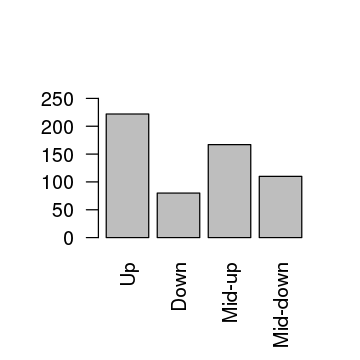

In [64]:
PlotPPCChangeOverTime()

## Gene expression change

In [68]:
c(lm_fit_coefs_sig[order(-abs(lm_fit_coefs_sig$estimate)), "gene_short_name"][1:4])

[1] "VIM"    "CALD1"  "KRT18"  "ANKRD1"

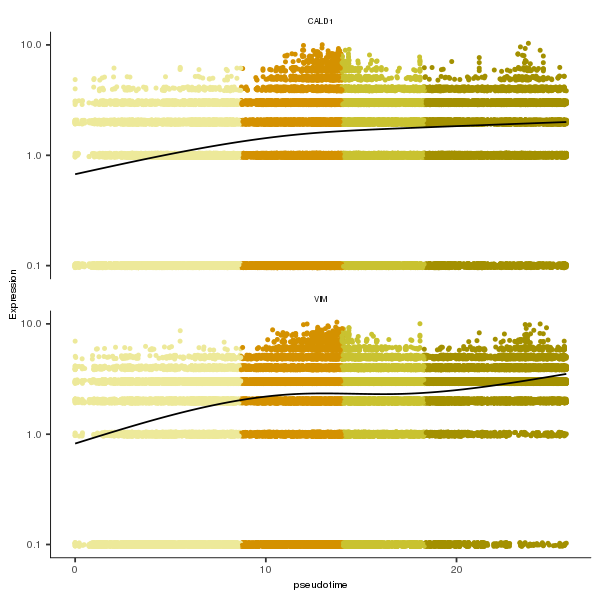

In [73]:
# genes = c(lm_fit_coefs_sig[order(-abs(lm_fit_coefs_sig$estimate)), "gene_short_name"][1:2])

# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]


genes = c("VIM", "CALD1")

genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

In [74]:
genes = c(lm_fit_coefs_sig[order((lm_fit_coefs_sig$estimate)), "gene_short_name"][1:2])

genes

[1] "GPC3"  "TXNIP"

In [280]:
genes = c(lm_fit_coefs_sig[order((lm_fit_coefs_sig$estimate)), "gene_short_name"][1:2])

genes

genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

[1] "GPC3"  "TXNIP"

In [86]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
integrated.C0_test_PPC_1 = read.table(paste(out, "integrated_PPC_1_markers.txt", sep = ""))
integrated.C0_test_PPC_2 = read.table(paste(out, "integrated_PPC_2_markers.txt", sep = ""))
integrated.C0_test_PPC_3 = read.table(paste(out, "integrated_PPC_3_markers.txt", sep = ""))
integrated.C0_test_PPC_4 = read.table(paste(out, "integrated_PPC_4_markers.txt", sep = ""))

In [87]:
PPC_sigs = c(rownames(integrated.C0_test_PPC_1), rownames(integrated.C0_test_PPC_2), rownames(integrated.C0_test_PPC_3), rownames(integrated.C0_test_PPC_4))

In [88]:
# PPC_sigs

In [78]:

# g2 = g2[g2$X2 > 0.956767,]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AC0", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AC1", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AL", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^Y-RNA.", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^CTD-", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^RN7", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^RNU", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^RP", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^SNO", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^sno", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^AP", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^MT", rownames(g2))],]
# g2 = g2 [! rownames(g2) %in% rownames(g2)[ grep( "^SLC", rownames(g2))],]


In [82]:
expressionBinned2model2mfuzz = read.table("/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/ppc_expression_binpseudo4_191213.txt")
expressionBinned2model2mfuzz$meanRow = rowMeans(expressionBinned2model2mfuzz)

g2 = mfuzz[mfuzz$maxCol == 1 & mfuzz$real == TRUE,]
expressionBinned2model2mfuzz = expressionBinned2model2mfuzz[rownames(g2), ] 
expressionBinned2model2mfuzz[expressionBinned2model2mfuzz$meanRow > .05,]

,time_1,time_2,time_3,time_4,meanRow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADARB1,0.04890298,0.05320616,0.05256821,0.04859261,0.05081749
CEP350,0.32802720,0.34694200,0.34432400,0.32806600,0.33683980
NFATC4,0.09991932,0.10685470,0.10606960,0.09957523,0.10310471
RERE,0.68897780,0.74637740,0.73572700,0.69426950,0.71633792
SELENBP1,0.22417520,0.25080110,0.24524490,0.22590290,0.23653103
ZNF445,0.18003490,0.20937330,0.20351520,0.17862310,0.19288663


In [81]:
head(expressionBinned2model2mfuzz[order(-expressionBinned2model2mfuzz$time_3),], 10)

,time_1,time_2,time_3,time_4,meanRow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RERE,0.688977800,0.746377400,0.735727000,0.694269500,0.716337925
CEP350,0.328027200,0.346942000,0.344324000,0.328066000,0.336839800
SELENBP1,0.224175200,0.250801100,0.245244900,0.225902900,0.236531025
ZNF445,0.180034900,0.209373300,0.203515200,0.178623100,0.192886625
NFATC4,0.099919320,0.106854700,0.106069600,0.099575230,0.103104713
ADARB1,0.048902980,0.053206160,0.052568210,0.048592610,0.050817490
BHLHB9,0.027803870,0.029663200,0.029343850,0.027589290,0.028600053
GPBAR1,0.022890900,0.027415080,0.026470300,0.022754320,0.024882650
PLGLB1,0.010643840,0.014000540,0.013440510,0.010712950,0.012199460


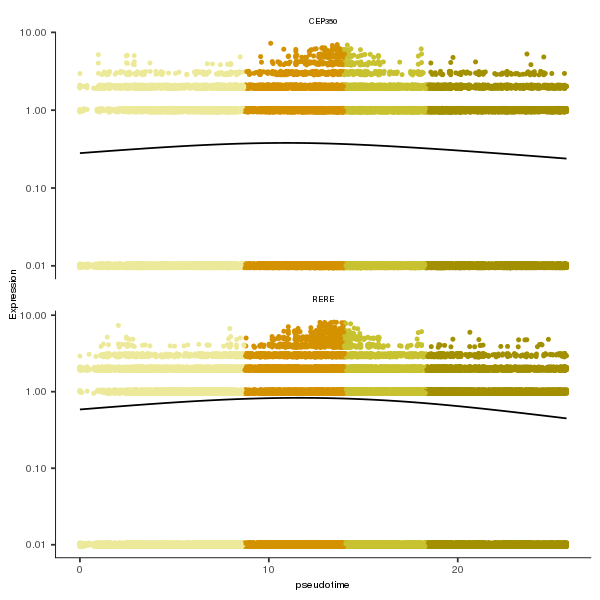

In [83]:
# genes = c("HECTD1", "RBPJ")
# genes = c("CAPN6", "FOXJ1")
genes = c("CEP350", "RERE")


genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.01) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

In [89]:
g6[ rownames(g6) %in% PPC_sigs, ]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,maxCol,real
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
GSTP1,0.01819511,0.02368052,0.04309847,0.05621243,0.02628991,0.7196080,0.01901002,0.03279643,0.03960588,0.02150328,6,TRUE
ILF2,0.01633270,0.02229593,0.04405584,0.04382686,0.02231282,0.7503157,0.01708002,0.03218298,0.03229516,0.01930198,6,TRUE
LSM4,0.01929273,0.02497102,0.04673457,0.05594119,0.02776248,0.7052811,0.01965458,0.03481975,0.04182923,0.02371337,6,TRUE
RRAS,0.01889605,0.02451177,0.04598032,0.05462252,0.02713163,0.7113632,0.01927161,0.03422799,0.04080773,0.02318713,6,TRUE
SNRPD3,0.01557256,0.02091079,0.04000249,0.04399177,0.02169511,0.7616143,0.01631002,0.02971899,0.03182636,0.01835763,6,TRUE
SUMO3,0.01706375,0.02231610,0.04204095,0.04921714,0.02433668,0.7390960,0.01752272,0.03128724,0.03640057,0.02071885,6,TRUE
TAGLN2,0.01781051,0.02318159,0.04346889,0.05170558,0.02552172,0.7276413,0.01824370,0.03240344,0.03831574,0.02170747,6,TRUE
TUBB4B,0.01953047,0.02728838,0.05564091,0.05003996,0.02606171,0.7008396,0.02056175,0.04009602,0.03709054,0.02285061,6,TRUE
UBE2I,0.01621675,0.02208841,0.04371207,0.04340478,0.02218210,0.7522152,0.01690351,0.03187189,0.03214659,0.01925867,6,TRUE


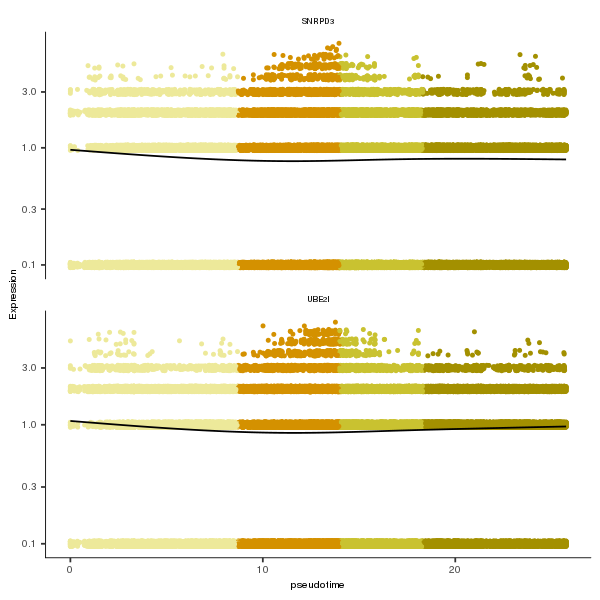

In [90]:

genes = c("SNRPD3", "UBE2I")

genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

options(repr.plot.width = 5, repr.plot.height = 5)

plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
                         scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

In [91]:

# genes = c("FKBP1A", "ILF2")

# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]

# options(repr.plot.width = 5, repr.plot.height = 5)

# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))

In [92]:
mfuzz["PDX1",]
mfuzz["NKX6-1",]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,maxCol,real
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
PDX1,0.1896142,0.06405976,0.04716478,0.08248324,0.1927242,0.05392291,0.1298776,0.05115765,0.09893337,0.09006223,5,FALSE


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,maxCol,real
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
NKX6-1,0.1984949,0.06200327,0.04618507,0.07855426,0.1996872,0.05249874,0.114423,0.04976539,0.09822073,0.1001674,5,FALSE


## GO on each set

## analyze genes from up and down
(mid.up and mid.down were calculated in 0.6_PPC_GO notebook)

In [93]:
## GO enrichment
FindGOenrichment <- function(genes, all.genes){
    
    list1 = genes
    list2 = all.genes

    genes_data = data.frame(gene = list2, inlist = 0, stringsAsFactors = FALSE)
    genes_data[genes_data$gene %in% list1, "inlist"] = 1
    genes_data$gene_id = str_split_fixed(genes_data$gene, "\\.", 2)[,1]
    genes_data = genes_data[!duplicated(genes_data$gene_id),]
    rownames(genes_data) = genes_data$gene_id
    genes_data$gene_id = NULL

    genes = genes_data$inlist
    names(genes) = rownames(genes_data)
    pwf=nullp(genes,"hg19", "ensGene", plot.fit = FALSE)
    gowall=goseq(pwf,"hg19","ensGene")

    gowall = gowall[gowall$numInCat > 10 & gowall$numInCat < 1000,]
    
    gowall$list1      = length(genes_data[genes_data$inlist == 1, "inlist"])
    gowall$list2      = length(genes_data[genes_data$inlist == 0, "inlist"])
    gowall$pvalue     = apply(gowall[, c("over_represented_pvalue", "under_represented_pvalue")], 1, min)
    gowall$bonferroni = p.adjust(gowall$pvalue, method = "bonferroni")
    gowall$bh         = p.adjust(gowall$pvalue, method = "BH")
    gowall_ordered <- gowall[order(gowall$over_represented_pvalue),]
    
    return(gowall_ordered)
    
}

In [104]:
head(lm_fit_coefs_sig)

length(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, "gene_short_name"])
length(lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0 & lm_fit_coefs_sig$q_value < 0.01, "gene_short_name"])


,gene_short_name,term,estimate,std_err,p_value,q_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
117,ABHD3,pseudotime_bin,0.0062627697,7.225189e-04,7.679528e-08,0.0026058941
128,ABLIM1,pseudotime_bin,0.0063035096,7.941619e-04,2.740772e-07,0.0092832700
816,AC011298.2,pseudotime_bin,-0.0010877546,1.125858e-04,1.513039e-08,0.0005141912
1098,AC023590.1,pseudotime_bin,-0.0006555628,8.823061e-05,6.905945e-07,0.0233476204
1138,AC027612.6,pseudotime_bin,0.0320211606,3.519377e-03,3.744060e-08,0.0012714079
1169,AC066593.1,pseudotime_bin,-0.0009627187,1.334556e-04,1.035045e-06,0.0349545214


[1] 222

[1] 130

In [116]:
table(down %in% "BPTF")


FALSE 
   80 

In [94]:
up = lm_fit_coefs_sig[lm_fit_coefs_sig$estimate > 0, "gene_short_name"]
down = lm_fit_coefs_sig[lm_fit_coefs_sig$estimate < 0, "gene_short_name"]

bg = rownames(integrated.C0_test)
bg = geneinfo[geneinfo$gene_name %in% bg, "gene_id"]

go_up =   FindGOenrichment(geneinfo[geneinfo$gene_name %in% up, "gene_id"], bg)
go_down = FindGOenrichment(geneinfo[geneinfo$gene_name %in% down, "gene_id"], bg)


Loading hg19 length data...
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
Loading required package: AnnotationDbi

For 37644 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns
Loading hg19 length data...
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 37644 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


In [95]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
write.table(go_up, file = paste(out, "gowall_ppc_up_191216.txt", sep = ""))
write.table(go_down, file = paste(out, "gowall_ppc_down_191216.txt", sep = ""))



In [96]:
go_mid.up = read.table(paste(out, "gowall_ppc_mid.up_191216.txt", sep = ""))
go_mid.down = read.table(paste(out, "gowall_ppc_mid.down_191216.txt", sep = ""))



In [117]:
head(go_down)

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology,list1,list2,pvalue,bonferroni,bh
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
13360,GO:0048538,1.090991e-05,0.9999997,4,45,thymus development,BP,80,56872,1.090991e-05,0.08922126,0.08922126
13389,GO:0048598,8.213865e-05,0.9999873,9,570,embryonic morphogenesis,BP,80,56872,8.213865e-05,0.67172990,0.18224106
1396,GO:0003002,8.783948e-05,0.9999900,7,340,regionalization,BP,80,56872,8.783948e-05,0.71835131,0.18224106
563,GO:0001655,8.913723e-05,0.9999898,7,317,urogenital system development,BP,80,56872,8.913723e-05,0.72896425,0.18224106
3972,GO:0008134,1.346708e-04,0.9999777,9,635,transcription factor binding,MF,80,56872,1.346708e-04,1.00000000,0.22026751
7441,GO:0030324,2.474224e-04,0.9999795,5,168,lung development,BP,80,56872,2.474224e-04,1.00000000,0.29539833


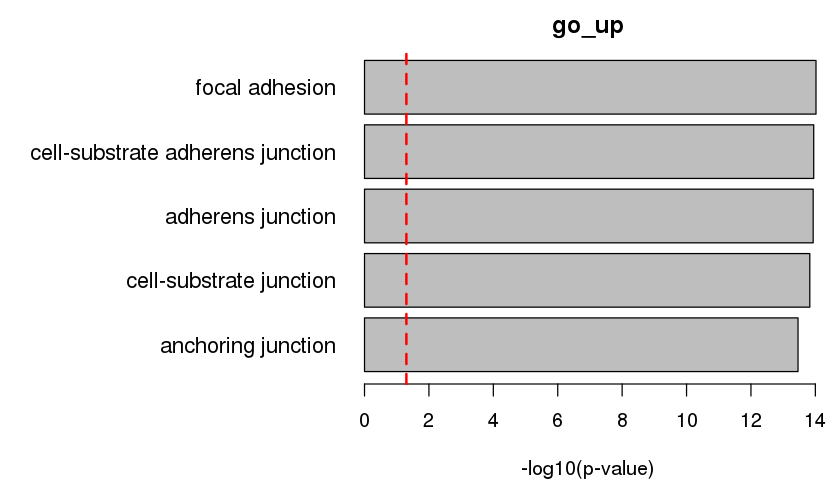

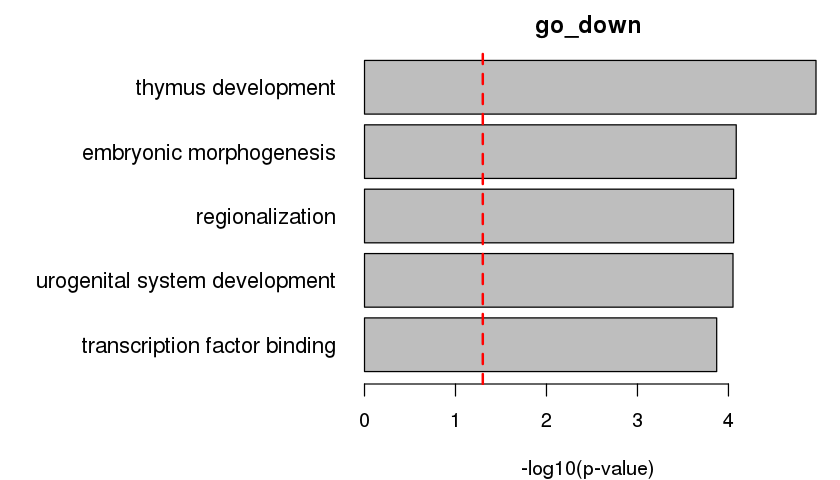

In [121]:
plot_go_barplots(go_up       , "go_up")
plot_go_barplots(go_down     , "go_down")

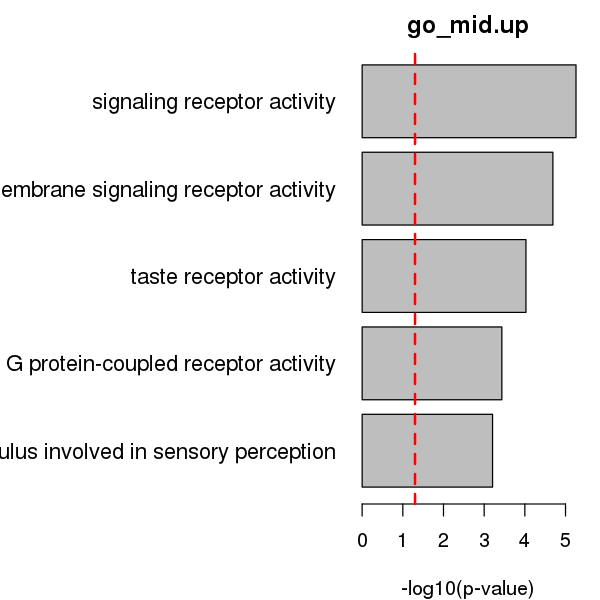

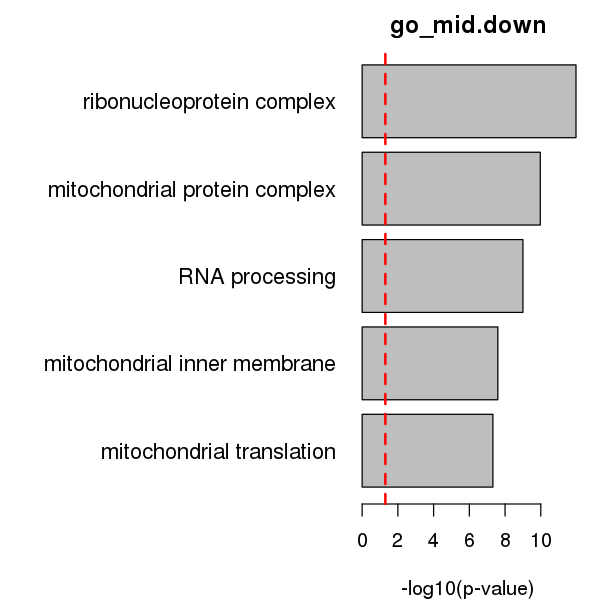

In [122]:
options(repr.plot.width = 5, repr.plot.height = 5)


plot_go_barplots(go_mid.up   , "go_mid.up")
plot_go_barplots(go_mid.down , "go_mid.down")

# 4F - GSEA results

In [288]:
gsea = read.table(paste(out, "ppc_fit_coefs_frazer_ppc_allexpressedgenes_gsea.txt", sep = ""))

In [118]:
plot_go_barplotsGSEA <- function(table, t){

    table$logq = -log(table$pvalue, 10)
    table[ table$stat.mean < 0, ]$logq = table[ table$stat.mean < 0, ]$logq*-1
    
    barplot(table$logq, names.arg=table$id, horiz=T, main=t,
            las=1, cex.axis=1, cex.names=0.5)
    abline(v=1.3, lwd=2, lty=2, col="red")
    abline(v=-1.3, lwd=2, lty=2, col="red")
    
}

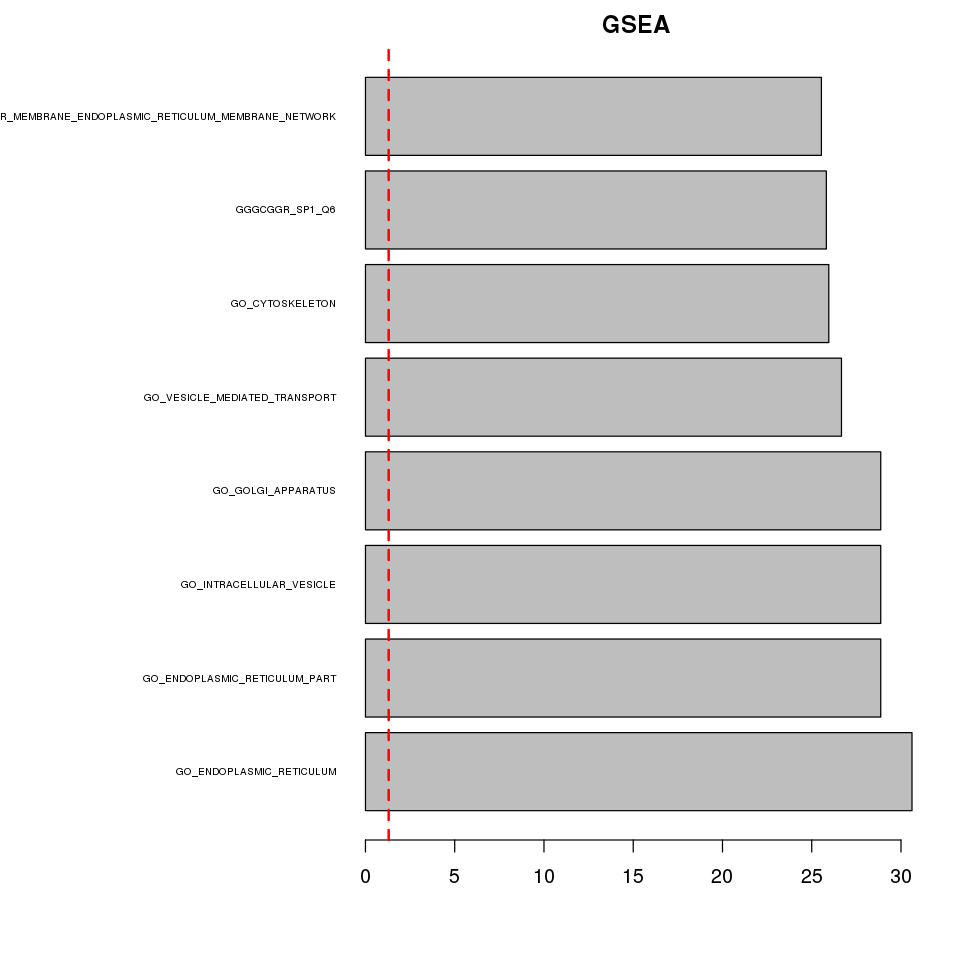

In [292]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 15, 2, 2))
a = subset(gsea, qval < 10e-25)
plot_go_barplotsGSEA(a[order(a$qval),], "GSEA")

# Write out

In [131]:
out = "../Figures/Manuscript_V04/new_Figure_3_"


png(paste(out, "UMAP_byCelltype.png"), width = 3, height = 3, units = "in", res = 1200)
options(repr.plot.width = 3, repr.plot.height = 3)
cols = data.frame(celltype = sort(unique(tiss.filtered$major_cell_population)),
                  col = c("#56ccd8", "#9c0031", "#5ebd53", "#d984c6", "#ede99a", "#d49100", "#c9c230", "#a39000", "#827f80"))

cols[cols$celltype %in% c("PPC_early", "PPC_late", "PPC_moderate_1", "PPC_moderate_2"), "col"] = "#42d488"
cols[cols$celltype %in% c("iPSC"), "col"] = "#02592c"

colsInt = rbind(data.frame(celltype = "0_PPC_unknown", col = "#7dba9a"), cols)
DimPlot(tiss.filtered, reduction = "umap", group.by = "major_cell_population_updated", cols = colsInt$col, label = F) + NoLegend()
dev.off()

pdf(paste(out, "FACS_barplot.pdf"), width = 4, height = 3)
colsInt[ colsInt$celltype  %in% c("PPC_early", "PPC_late", "PPC_moderate_1", "PPC_moderate_2"), ]$celltype = "PPC"
colsInt = colsInt[! duplicated(colsInt$celltype), ]
PlotFractionCluster()
dev.off()

# pdf(paste(out, "FACS_PPC_scatter.pdf"), width = 3, height = 3)
# PlotFractionClusterVSFACS()
# dev.off()


pdf(paste(out, "DotPlot_top5DE.pdf"), width = 12, height = 6)
DotPlot(tiss.filtered, features = rev(top5.eachcelltype), cols = c("blue", "red"), dot.scale = 8) + RotatedAxis()
dev.off()

# pdf(paste(out, "GO_DEbycelltype.pdf"), width = 7, height = 4)
# par(mfrow = c(3,2))
# plot_go_barplots(gowall_ipsc       , "iPSC")
# plot_go_barplots(gowall_ppc        , "All PPCs")
# plot_go_barplots(gowall_repl       , "Replicating cells")
# plot_go_barplots(gowall_endocrine  , "Endocrine cells")
# plot_go_barplots(gowall_mesenchyme , "Mesenchymal cells")
# plot_go_barplots(gowall_endothelial, "Endothelial cells")
# dev.off()

png(paste(out, "UMAP_byPPC_pseudotime.png"), width = 3, height = 3, units = "in", res = 1200)
PlotUMAPContinuous(tiss.filtered, "pseudotime", 7, 16, text_width = 2, n.col = 2)
dev.off()


pdf(paste(out, "Barplot_n_genesDelta_ppc.pdf"), width = 3, height = 3)
PlotPPCChangeOverTime()
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [ ]:
# png(paste(out, "Expression_over_pseudotime_up.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("VIM", "SPP1")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()


# png(paste(out, "Expression_over_pseudotime_down.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("GPC3", "TXNIP")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()


# png(paste(out, "Expression_over_pseudotime_midup.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("CAPN6", "FOXJ1")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()

# png(paste(out, "Expression_over_pseudotime_middown.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
# genes = c("FKBP1A", "ILF2")
# genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes,]
# plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime_quantile", min_expr=0.1) +
#                          scale_color_manual(values = c("#ede99a", "#d49100","#c9c230", "#a39000"), guide = FALSE) +
#                          theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6))
# dev.off()

png 
  2

png 
  2

In [136]:
out = "../Figures/Manuscript_V04/new_Figure_3_"

cells2use   = rownames(pData(cds_subset)[ (! pData(cds_subset)$RNA_snn_res.0.3 %in% c("4")), ])

png(paste(out, "Expression_over_pseudotime_up.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
genes = c("VIM", "CALD1")
genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes, cells2use]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()


png(paste(out, "Expression_over_pseudotime_down.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
genes = c("GPC3", "TXNIP")
genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes, cells2use]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()


png(paste(out, "Expression_over_pseudotime_midup.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
genes = c("CEP350", "RERE")


genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes, cells2use]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()

png(paste(out, "Expression_over_pseudotime_middown.png"), width = 1.25, height = 1.25, units = "in", res = 1200)
genes = c("SNRPD3", "UBE2I")
genes2plot = cds_subset[rowData(cds_subset)$gene_short_name %in% genes, cells2use]
plot_genes_in_pseudotime(genes2plot,color_cells_by = "pseudotime", min_expr=0.1, cell_size = 0.1) +
                         theme(text = element_text(size=6), axis.text.x = element_text(size=6), axis.text.y = element_text(size=6), legend.position = "none")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [133]:
pdf(paste(out, "GO_PPC_delta.pdf"), width = 12, height = 6)
par(mfrow = c(2,2))
plot_go_barplots(go_up       , "go_up")
plot_go_barplots(go_down     , "go_down")
plot_go_barplots(go_mid.up   , "go_mid.up")
plot_go_barplots(go_mid.down , "go_mid.down")
dev.off()

# pdf(paste(out, "GSEA.pdf"), width = 8, height = 8)

# par(mar = c(5, 15, 2, 2))
# a = subset(gsea, qval < 10e-25)
# plot_go_barplotsGSEA(a[order(a$qval),], "GSEA")
# dev.off()

png 
  2